## Stock Prediction Using Regression

To build the stock price prediction model, we will use the NSE TATA GLOBAL dataset. This is a dataset of Tata Beverages from Tata Global Beverages Limited, National Stock Exchange of India:

https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Data/NSE-Tata-Global-Beverages-Limited.zip

### Step 1: Load the data

In [2]:
import pandas as pd

# Load the datset
df = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


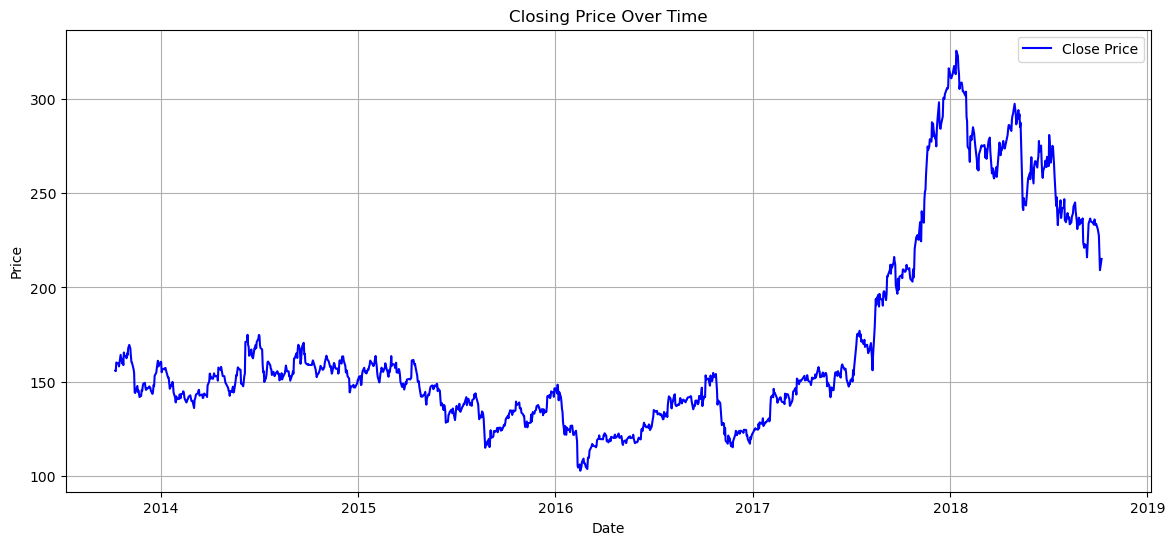

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

dates = pd.to_datetime(df['Date'])

plt.figure(figsize=(14, 6))
plt.plot(dates, df['Close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

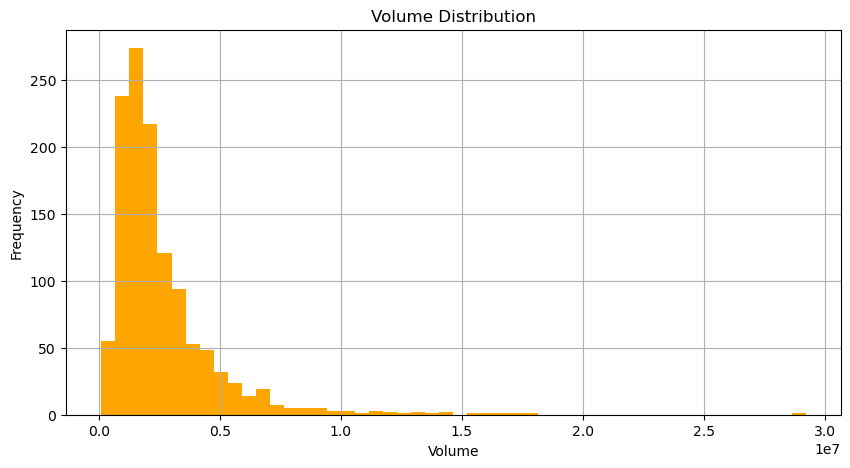

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(df['Total Trade Quantity'], bins=50, color='orange')
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

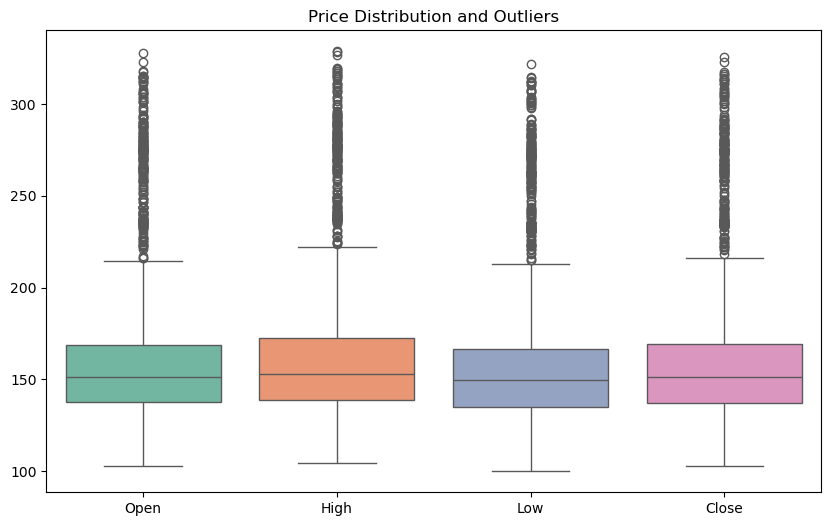

In [7]:
# Outlier detection in price columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette='Set2')
plt.title('Price Distribution and Outliers')
plt.show()

### Step 2: Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Total Trade Quantity', 'Turnover (Lacs)']
target = 'Close'

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 3: Cross Validation Techniques

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

cv_scores = cross_val_score(model, X_scaled, y , cv=5, scoring='r2')

print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Average R^2 Score: {cv_scores.mean()}')

Cross-Validation R^2 Scores: [0.99325163 0.99838048 0.99434962 0.99362413 0.98839574]
Average R^2 Score: 0.9936003181156549


### Step 4: Model Evaluation

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R^2 Score: 0.9994259388623857
Mean Squared Error: 1.612382954669022
Mean Absolute Error: 0.8703748122973735


### Step 5: Hyperparameter Tuning

**Grid Search**

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

grid.fit(X_scaled, y)

print(f"Best Performer: {grid.best_estimator_}")

Best Performer: RandomForestRegressor(max_depth=10, random_state=42)


In [15]:
rf_grid = grid.best_estimator_

y_pred_rf = rf_grid.predict(X_test)

r2_grid = r2_score(y_test, y_pred_rf)
mse_grid = mean_squared_error(y_test, y_pred_rf)
mae_grid = mean_absolute_error(y_test, y_pred_rf)

print(f"R^2 Score: {r2_grid}")
print(f"Mean Squared Error: {mse_grid}")
print(f"Mean Absolute Error: {mae_grid}")

R^2 Score: 0.9998082842308148
Mean Squared Error: 0.5384779043919035
Mean Absolute Error: 0.527184459788785


**Randomized Search**

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30)
}

random_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)

# Fit the model
random_cv.fit(X_scaled, y)

print(f"Best Parameters: {random_cv.best_params_}")

Best Parameters: {'max_depth': 11, 'n_estimators': 171}


In [16]:
rf_random = random_cv.best_estimator_

y_pred_rf_random = rf_random.predict(X_test)

r2_random = r2_score(y_test, y_pred_rf_random)
mse_random = mean_squared_error(y_test, y_pred_rf_random)
mae_random = mean_absolute_error(y_test, y_pred_rf_random)

print(f"R^2 Score: {r2_random}")
print(f"Mean Squared Error: {mse_random}")
print(f"Mean Absolute Error: {mae_random}")

R^2 Score: 0.9998320478211283
Mean Squared Error: 0.47173238644510995
Mean Absolute Error: 0.4844231099221717


### Model Interpretation and Feature Importance

Here we are taking the best estimator that the RandomizedSearchCV got because it has the best metrics measures

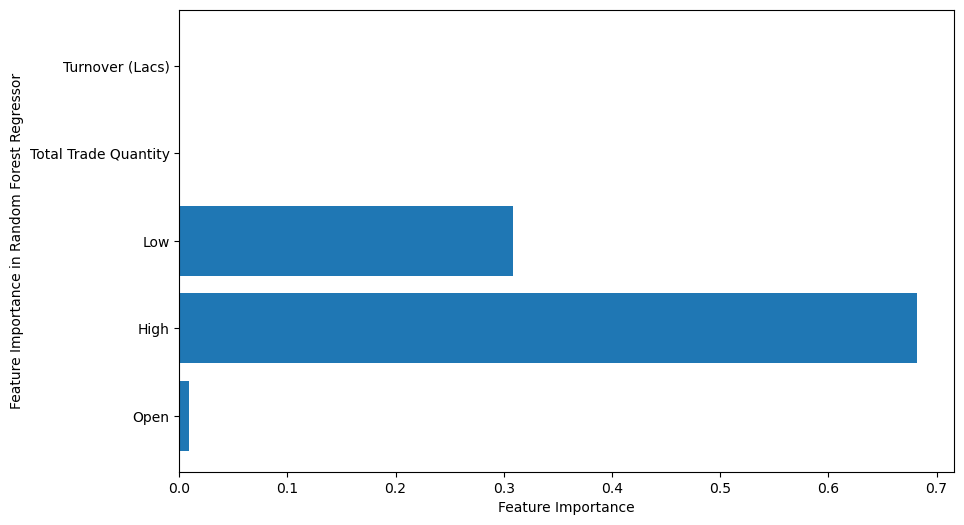

In [17]:
import matplotlib.pyplot as plt

importances = rf_random.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Importance in Random Forest Regressor')
plt.show()

We can conclude that by removing Turnover (Lacs) and Total Trade Quantity the model will be still able to perform.